In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Tiamiyu1/Health-Insurance-Analysis/main/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Plot Titles

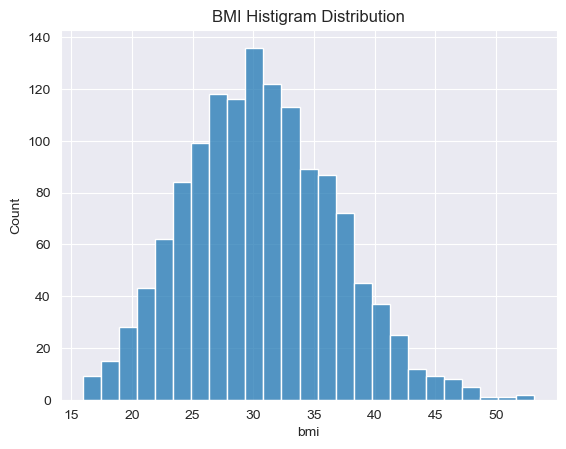

In [3]:
sns.set_style('darkgrid')
sns.histplot(df.bmi)
plt.title('BMI Histigram Distribution')
plt.show()

## Axes Label

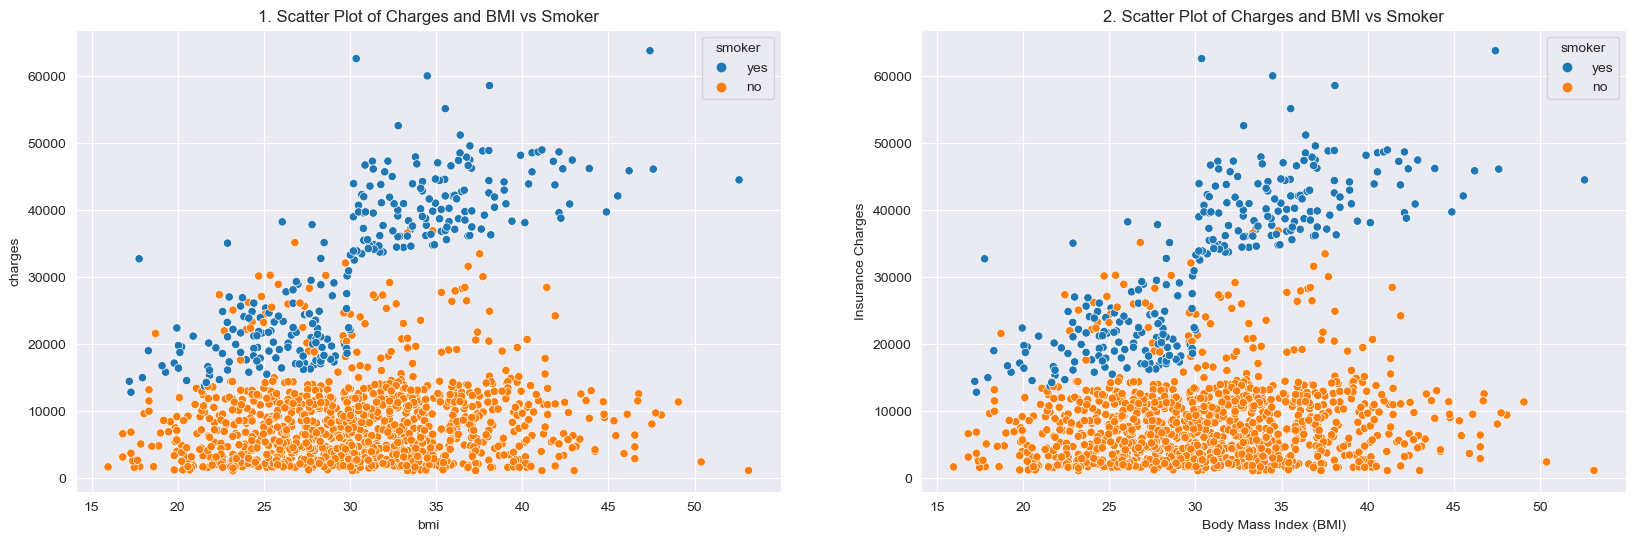

In [4]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1) # Plot 1 with default axes label
sns.scatterplot(x=df.bmi, y=df.charges,  hue=df.smoker)
plt.title('1. Scatter Plot of Charges and BMI vs Smoker')
plt.subplot(1,2,2) # Plot 2 with modified and informative axes label
sns.scatterplot(x=df.bmi, y=df.charges,  hue=df.smoker)
plt.title('2. Scatter Plot of Charges and BMI vs Smoker')
plt.xlabel('Body Mass Index (BMI)') # Xlabel
plt.ylabel('Insurance Charges') # Ylabel
plt.show()

In [5]:
dff = df.copy()
dff.sex.replace({'female':1, 'male':0}, inplace=True)
dff.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


## Value Label

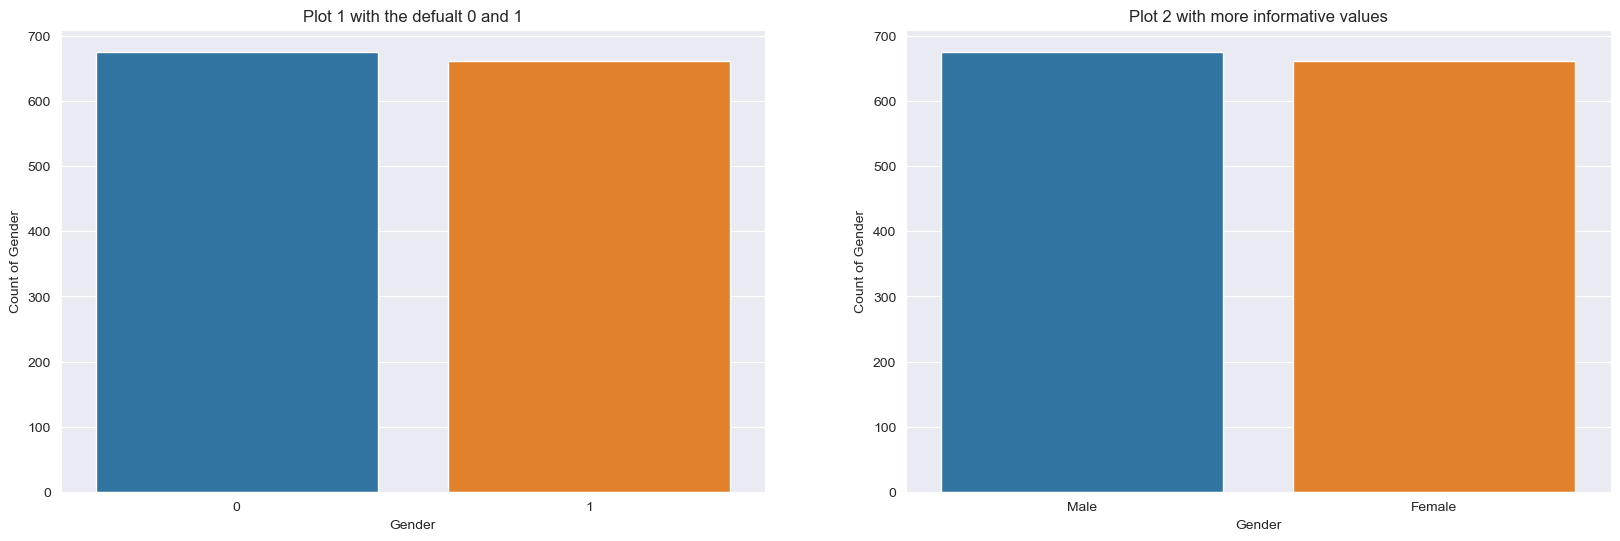

In [6]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1) # Plot 1 with default axes label
sns.countplot(x=dff.sex)
plt.title('Plot 1 with the defualt 0 and 1')
plt.xlabel('Gender') # Xlabel
plt.ylabel('Count of Gender') # Ylabel
plt.subplot(1,2,2) # Plot 2 with modified and informative axes label
sns.countplot(x=dff.sex)
plt.title('Plot 2 with more informative values')
plt.xlabel('Gender') # Xlabel
plt.ylabel('Count of Gender') # Ylabel
plt.xticks([0,1], ['Male', 'Female']) 
plt.show()

##  Tidy Text Output

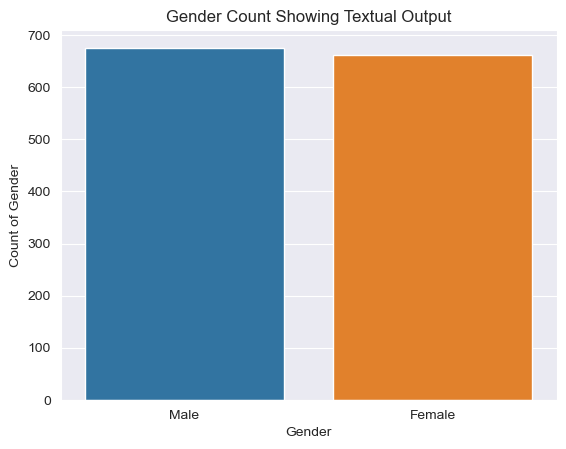

In [7]:
sns.countplot(x=dff.sex)
plt.title('Gender Count Showing Textual Output')
plt.xlabel('Gender') # Xlabel
plt.ylabel('Count of Gender') # Ylabel
plt.xticks([0,1], ['Male', 'Female'])
plt.show()

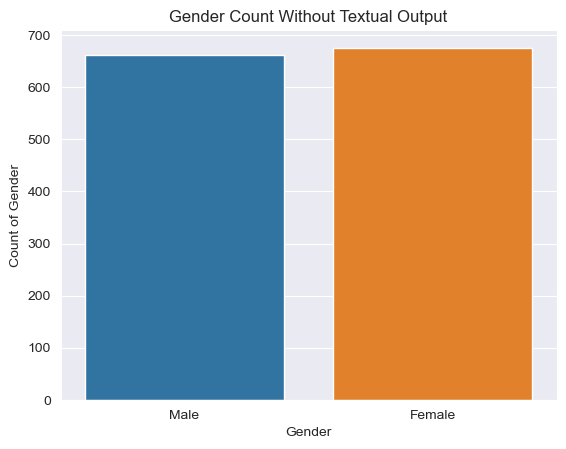

In [8]:
sns.countplot(x=df.sex)
plt.title('Gender Count Without Textual Output')
plt.xlabel('Gender') # Xlabel
plt.ylabel('Count of Gender') # Ylabel
plt.xticks([0,1], ['Male', 'Female'])
plt.show()

In [9]:
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2023-12-31')

# Generate random timedelta values within the specified range
delta_days = (end_date - start_date).days
df['timedelta'] = pd.to_timedelta(np.random.randint(delta_days, size=len(df)), unit='D')
df['datetime'] = start_date + df['timedelta']

# Extract month and year from datetime
df['month'] = df['datetime'].dt.month_name()
df['year'] = df['datetime'].dt.year

# Drop the intermediate timedelta column if not needed
df = df.drop(columns=['timedelta'])
df.sort_values('datetime', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

## Color Scheme

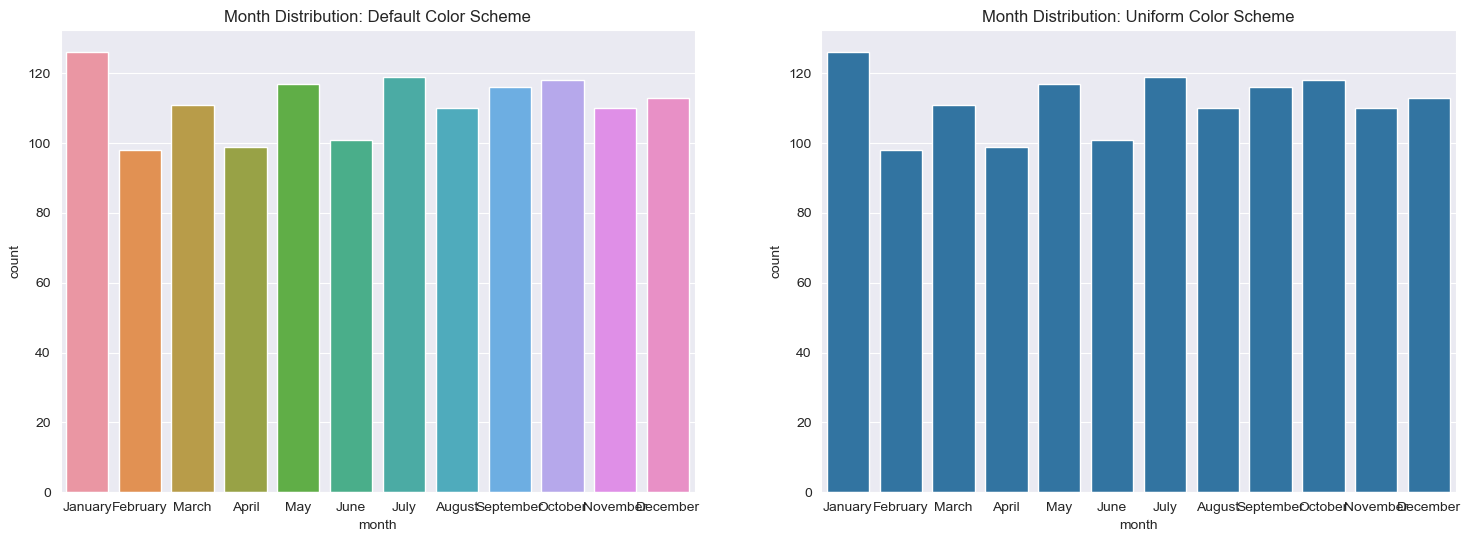

In [10]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.countplot(x=df.month)
plt.title('Month Distribution: Default Color Scheme')

plt.subplot(1,2,2)
sns.countplot(x=df.month, color=sns.color_palette()[0])
plt.title('Month Distribution: Uniform Color Scheme' )
plt.show()

## Axes Rotation

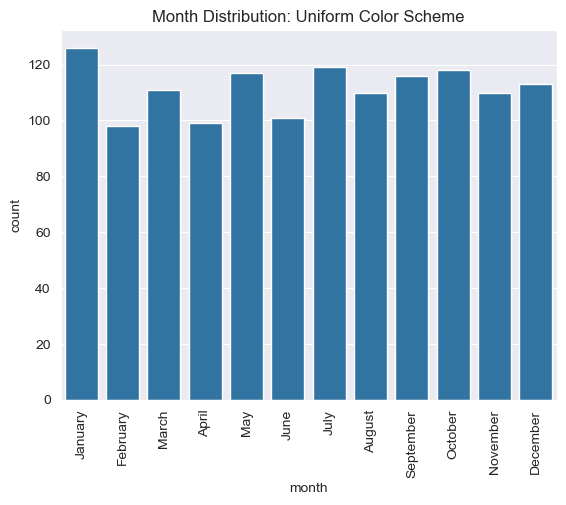

In [11]:
sns.countplot(x=df.month, color=sns.color_palette()[0])
plt.title('Month Distribution: Uniform Color Scheme' )
plt.xticks(rotation=90)
plt.show()

## Value Display on Plots

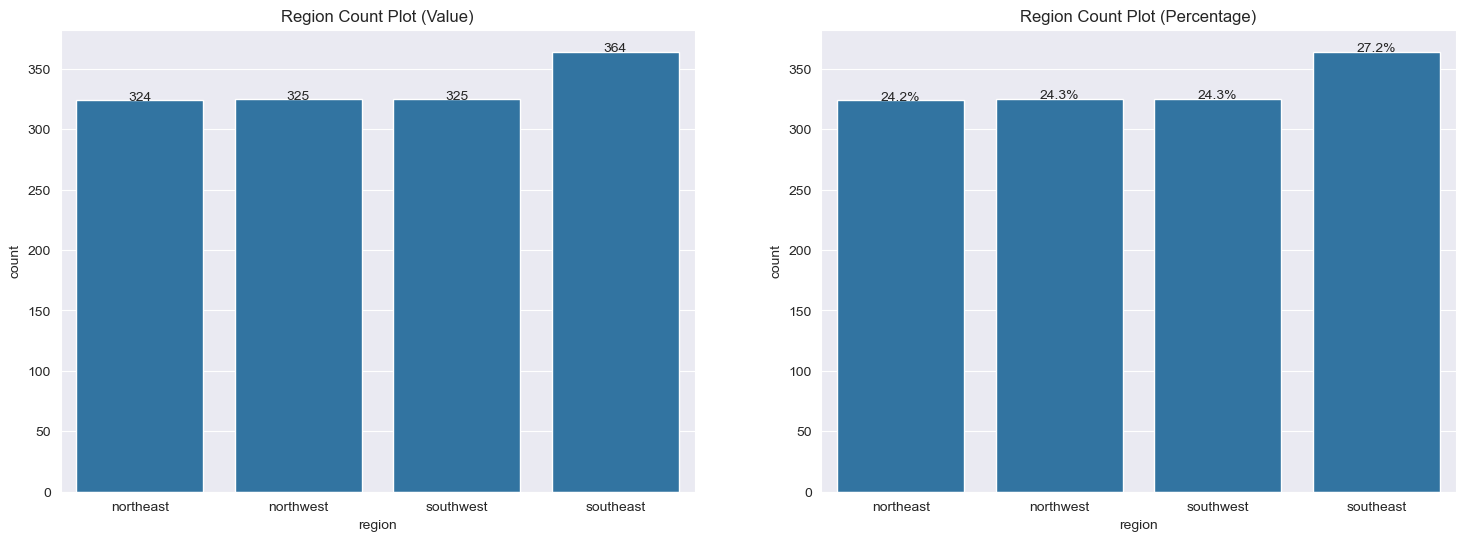

In [12]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
ax = sns.countplot(x=df.region,  color=sns.color_palette()[0])
plt.title('Region Count Plot (Value)')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + (p.get_width() / 2.), p.get_height()), ha='center', va='baseline')


plt.subplot(1,2,2)
ax = sns.countplot(x=df.region,  color=sns.color_palette()[0])
plt.title('Region Count Plot (Percentage)')
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
    
plt.show()

## Pie Chart Customization

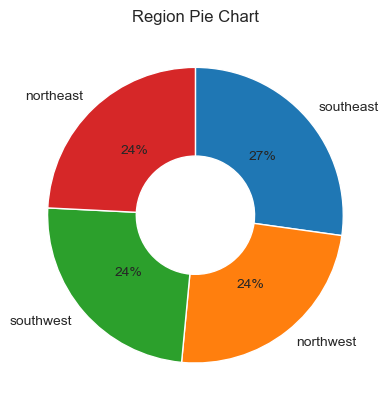

In [13]:
sorted_counts = df['region'].value_counts()

plt.pie(sorted_counts, labels=sorted_counts.index,  startangle = 90, 
counterclock = False,  autopct='%.0f%%', wedgeprops = {'width' : 0.6})

plt.title('Region Pie Chart')
plt.show()

## Legend Placement

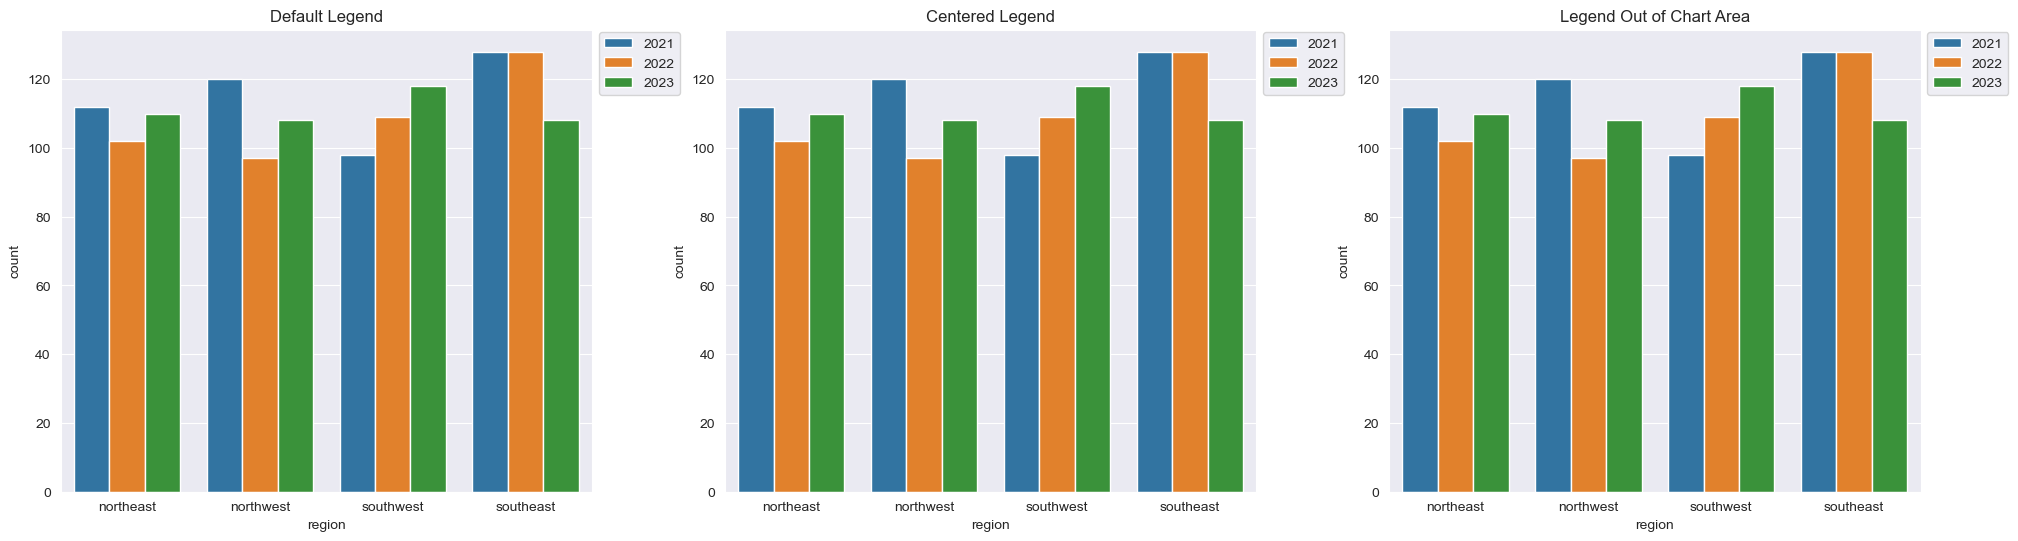

In [14]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
sns.countplot(x=df.region, hue=df.year)
plt.title('Default Legend')
plt.legend(loc=2, bbox_to_anchor=(1, 1.01))

plt.subplot(1,3,2)
sns.countplot(x=df.region, hue=df.year)
plt.title('Centered Legend')
plt.legend(loc=2, bbox_to_anchor=(1, 1.01))

plt.subplot(1,3,3)
sns.countplot(x=df.region, hue=df.year)
plt.title('Legend Out of Chart Area')
plt.legend(loc=2, bbox_to_anchor=(1, 1.01))

plt.subplots_adjust(wspace=0.25)
plt.show()

## Adjusting Axes Limits

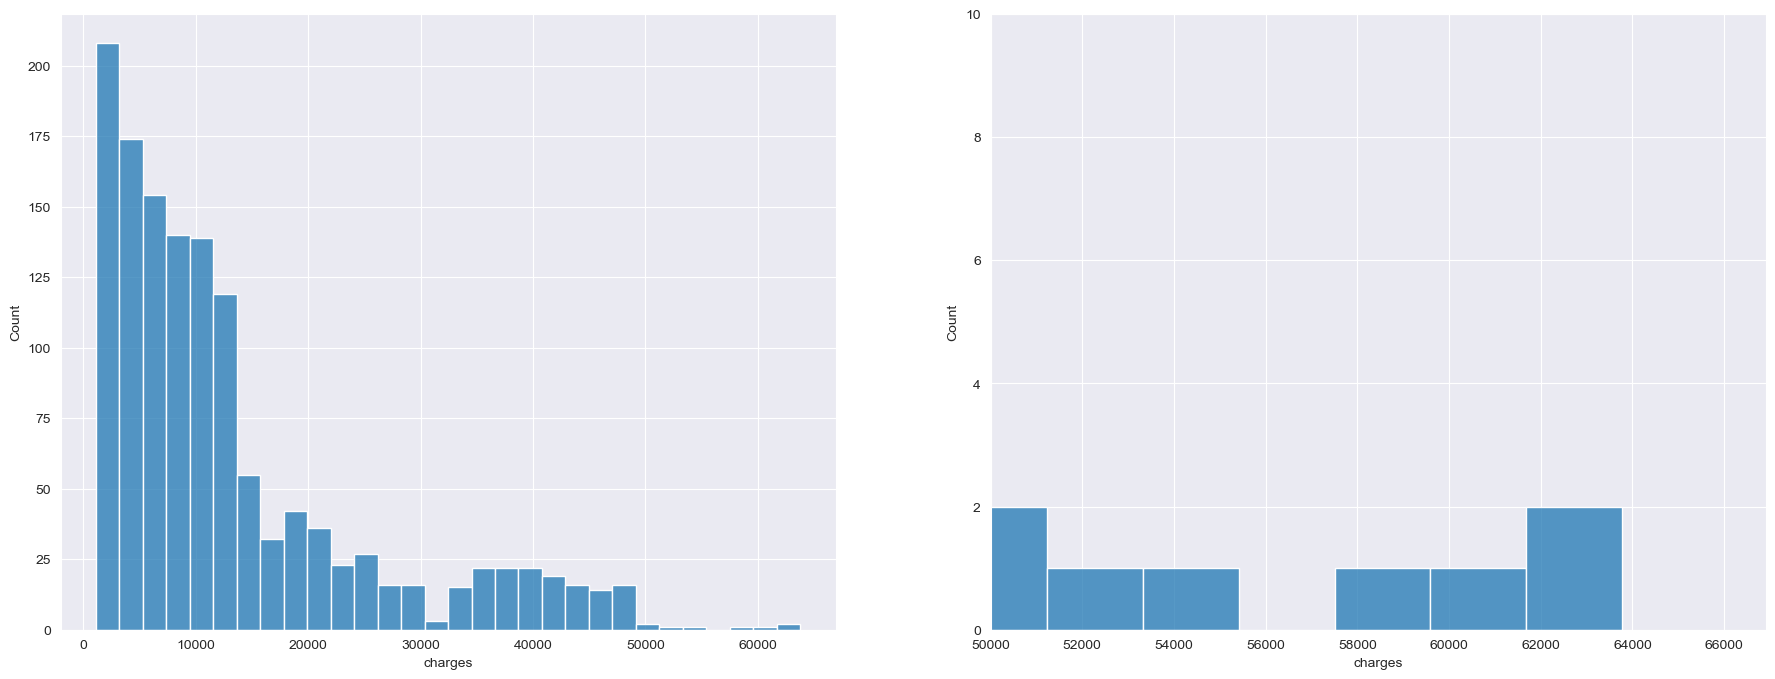

In [15]:
plt.figure(figsize=(22,8))

plt.subplot(1,2,1) # Plot 1 with default axes label
sns.histplot(x=df.charges)

plt.subplot(1,2,2)
sns.histplot(x=df.charges)
plt.xlim(50000,)
plt.ylim(0,10)
plt.show()